In [3]:
# Copyright 2019 The TensorFlow Authors All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

In [4]:
# Visualization of the YAMNet audio event classification model.
# See https://github.com/tensorflow/models/tree/master/research/audioset/yamnet/
#
# This notebook can be run in Google Colab at https://colab.research.google.com
# by either downloading this ipynb and uploading it, or by looking up the
# notebook directly on GitHub in Colab's "Open notebook" dialog.

In [5]:
# Install required packages.
!pip install soundfile
!git clone https://github.com/tensorflow/models.git
%cd models/research/audioset/yamnet

# Download YAMNet data
!curl -O https://storage.googleapis.com/audioset/yamnet.h5

# Download audio for testing
!curl -O https://storage.googleapis.com/audioset/speech_whistling2.wav

!ls -l

[WinError 3] 系统找不到指定的路径。: 'models/research/audioset/yamnet'
C:\Users\ASUS\models-master\research\audioset\yamnet


'git' 不是内部或外部命令，也不是可运行的程序
或批处理文件。
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 14.5M    0 20583    0     0  35500      0  0:07:10 --:--:--  0:07:10 35487
 34 14.5M   34 5126k    0     0  4044k      0  0:00:03  0:00:01  0:00:02 4045k
 95 14.5M   95 13.8M    0     0  6266k      0  0:00:02  0:00:02 --:--:-- 6265k
100 14.5M  100 14.5M    0     0  6297k      0  0:00:02  0:00:02 --:--:-- 6297k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  153k  100  153k    0     0   264k      0 --:--:-- --:--:-- --:--:--  265k
'ls' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [6]:
!pip install nltk

In [7]:
# Imports.
import numpy as np
import soundfile as sf

import matplotlib.pyplot as plt

import params as yamnet_params
import yamnet as yamnet_model
import tensorflow as tf

import nltk
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')

import matplotlib.pyplot as plt
import numpy as np

from tabulate import tabulate


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [8]:
!pip install gensim

In [9]:
import gensim
from gensim.models import Word2Vec
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
import gensim.downloader as api
import numpy as np
from sklearn.cluster import KMeans

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [11]:
!pip install matplotlib scikit-learn


In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [13]:
!pip install requests

#  A_Get Top Classes and Gray Scale Graph 

In [14]:
# Read in the audio.
wav_file_name = 'Istanbul alley6.wav'
wav_data, sr = sf.read(wav_file_name, dtype=np.int16)
waveform = wav_data / 32768.0

In [15]:
# The graph is designed for a sampling rate of 16 kHz, but higher rates should work too.
# We also generate scores at a 10 Hz frame rate.
params = yamnet_params.Params(sample_rate=sr, patch_hop_seconds=0.1)
print("Sample rate =", params.sample_rate)

Sample rate = 48000


In [16]:
# Set up the YAMNet model.
class_names = yamnet_model.class_names('yamnet_class_map.csv')
yamnet = yamnet_model.yamnet_frames_model(params)
yamnet.load_weights('yamnet.h5')

In [17]:
# Run the model.
scores, embeddings, spectrogram = yamnet(waveform)
scores = scores.numpy()
spectrogram = spectrogram.numpy()

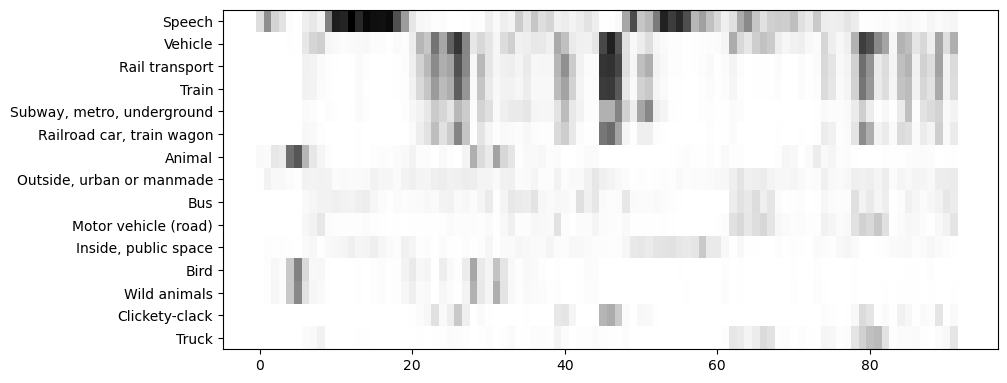

In [18]:
plt.figure(figsize=(10, 15))
# Plot and label the model output scores for the top-scoring classes.
mean_scores = np.mean(scores, axis=0)
top_N = 15
top_class_indices = np.argsort(mean_scores)[::-1][:top_N]

# Get the names of the top N classes
top_class_names = [class_names[top_class_indices[x]] for x in range(top_N)]

plt.subplot(3, 1, 3)
plt.imshow(scores[:, top_class_indices].T, aspect='auto', interpolation='nearest', cmap='gray_r')
# Compensate for the patch_window_seconds (0.96s) context window to align with spectrogram.
patch_padding = (params.patch_window_seconds / 2) / params.patch_hop_seconds
plt.xlim([-patch_padding, scores.shape[0] + patch_padding])

# Label the top_N classes.
yticks = range(0, top_N, 1)
plt.yticks(yticks, top_class_names)
_ = plt.ylim(-0.5 + np.array([top_N, 0]))


In [19]:
# Convert the top_class_names to a nested list for tabulate
top_class_names_list = [[name] for name in top_class_names]

# Print the table with y-axis labels in multiples
table = tabulate(top_class_names_list, headers=['Top Classes'], tablefmt='plain')
print(table)


Top Classes
Speech
Vehicle
Rail transport
Train
Subway, metro, underground
Railroad car, train wagon
Animal
Outside, urban or manmade
Bus
Motor vehicle (road)
Inside, public space
Bird
Wild animals
Clickety-clack
Truck


In [20]:
# Convert the top_class_names to a flat list
top_class_names = [name for sublist in top_class_names_list for name in sublist]

# Convert the top_class_names to lowercase
lowercase_class_names = [name.lower() for name in top_class_names]

# Print the output as a list
print("Top Classes:")
print(lowercase_class_names)

Top Classes:
['speech', 'vehicle', 'rail transport', 'train', 'subway, metro, underground', 'railroad car, train wagon', 'animal', 'outside, urban or manmade', 'bus', 'motor vehicle (road)', 'inside, public space', 'bird', 'wild animals', 'clickety-clack', 'truck']


# B_Modify Phrases

In [24]:
def process_phrases(phrases):
    modified_phrases = []
    modifications_dict = {}

    for phrase in phrases:
        # Remove any text within parentheses '()'
        if '(' in phrase and ')' in phrase:
            phrase = phrase[:phrase.index('(')] + phrase[phrase.index(')')+1:]

        modified_phrase = phrase
        # If ',' or '-' present, keep only the part before
        if ',' in phrase or '-' in phrase:
            modified_phrase = modified_phrase.split(',', 1)[0]
            modified_phrase = modified_phrase.split('-', 1)[0]
        
        # If ' ' present, keep only the part after
        if ' ' in modified_phrase:
            modified_phrase = modified_phrase.split(' ', 1)[1]
        
        modified_phrases.append(modified_phrase)
        modifications_dict[phrase] = modified_phrase

    return modified_phrases, modifications_dict


phrases = ['speech', 'vehicle', 'rail transport', 'train', 'subway, metro, underground', 
           'railroad car, train wagon', 'animal', 'outside, urban or manmade', 'bus', 
           'motor vehicle (road)', 'inside, public space', 'bird', 'wild animals', 
           'clickety-clack', 'truck']

modified_phrases, modifications_dict = process_phrases(phrases)

print("Modified Phrases:", modified_phrases)
print("Modifications Dictionary:", modifications_dict)


Modified Phrases: ['speech', 'vehicle', 'transport', 'train', 'subway', 'car', 'animal', 'outside', 'bus', 'vehicle ', 'inside', 'bird', 'animals', 'clickety', 'truck']
Modifications Dictionary: {'speech': 'speech', 'vehicle': 'vehicle', 'rail transport': 'transport', 'train': 'train', 'subway, metro, underground': 'subway', 'railroad car, train wagon': 'car', 'animal': 'animal', 'outside, urban or manmade': 'outside', 'bus': 'bus', 'motor vehicle ': 'vehicle ', 'inside, public space': 'inside', 'bird': 'bird', 'wild animals': 'animals', 'clickety-clack': 'clickety', 'truck': 'truck'}


# C_Group words

In [25]:
# Load the pre-trained Word2Vec model
model = api.load('word2vec-google-news-300')
,
# List of input words to group by meaning
input_words = modified_phrases
# Get word vectors for input words
word_vectors = []
word_indices = []
for i, word in enumerate(input_words):
    if word in model:
        word_vectors.append(model[word])
        word_indices.append(i)

# Check if any word vectors were found
if len(word_vectors) == 0:
    print("No word vectors found for input words. Please check your input words or try with a different Word2Vec model.")
else:
    # Perform word clustering using K-means
    num_clusters = 5  # specify the number of clusters
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(word_vectors)
    cluster_labels = kmeans.labels_

    # Group input words based on cluster labels
    word_groups = {}
    for i, word in enumerate(input_words):
        if word in model:
            word_index = np.where(np.array(word_indices) == i)[0][0]
            cluster_label = cluster_labels[word_index]
            if cluster_label not in word_groups:
                word_groups[cluster_label] = []
            word_groups[cluster_label].append(word)

    # Print the word groups
    for cluster_label, words in word_groups.items():
        print(f"Cluster {cluster_label}: {words}")

Cluster 4: ['speech']
Cluster 3: ['vehicle', 'car', 'truck']
Cluster 0: ['transport', 'train', 'subway', 'bus']
Cluster 1: ['animal', 'bird', 'animals']
Cluster 2: ['outside', 'inside', 'clickety']


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

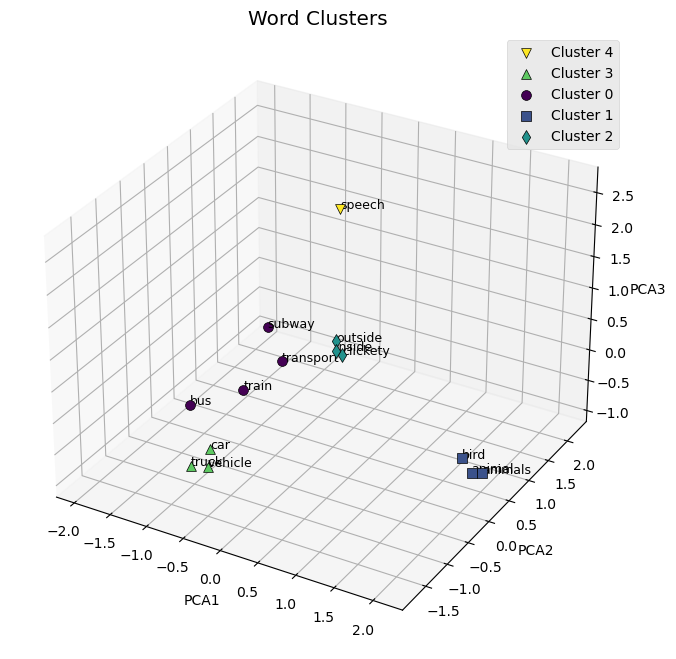

In [26]:

# Reduce dimensionality to 3D using PCA
pca = PCA(n_components=3)
word_vectors_3d = pca.fit_transform(word_vectors)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Customize plot appearance
plt.style.use('ggplot')
#plt.style.use('classic')



marker_styles = ['o', 's', 'd', '^', 'v']
colors = plt.cm.viridis(np.linspace(0, 1, len(marker_styles)))

# Plot the word vectors in the 3D scatter plot
for i, word in enumerate(input_words):
    if word in model:
        word_index = np.where(np.array(word_indices) == i)[0][0]
        cluster_label = cluster_labels[word_index]
        ax.scatter(word_vectors_3d[word_index, 0], word_vectors_3d[word_index, 1], word_vectors_3d[word_index, 2], c=colors[cluster_label], marker=marker_styles[cluster_label], s=50, edgecolor='k', label=f'Cluster {cluster_label}')
        ax.text(word_vectors_3d[word_index, 0], word_vectors_3d[word_index, 1], word_vectors_3d[word_index, 2], word, fontsize=9)

# Set plot title and labels
ax.set_title("Word Clusters")
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")

# Show legend and plot
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()


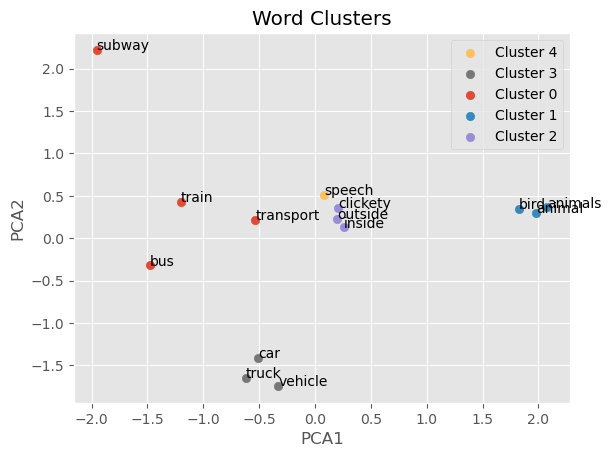

In [30]:
# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Plot the word vectors in a scatter plot
fig, ax = plt.subplots()
plt.style.use('ggplot')



for i, word in enumerate(input_words):
    if word in model:
        word_index = np.where(np.array(word_indices) == i)[0][0]
        cluster_label = cluster_labels[word_index]
        ax.scatter(word_vectors_2d[word_index, 0], word_vectors_2d[word_index, 1], c=f'C{cluster_label}', label=f'Cluster {cluster_label}')
        ax.annotate(word, (word_vectors_2d[word_index, 0], word_vectors_2d[word_index, 1]))

# Set plot title and labels
ax.set_title("Word Clusters")
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")

# Show legend and plot
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()


# D_Processing Grayscale Data

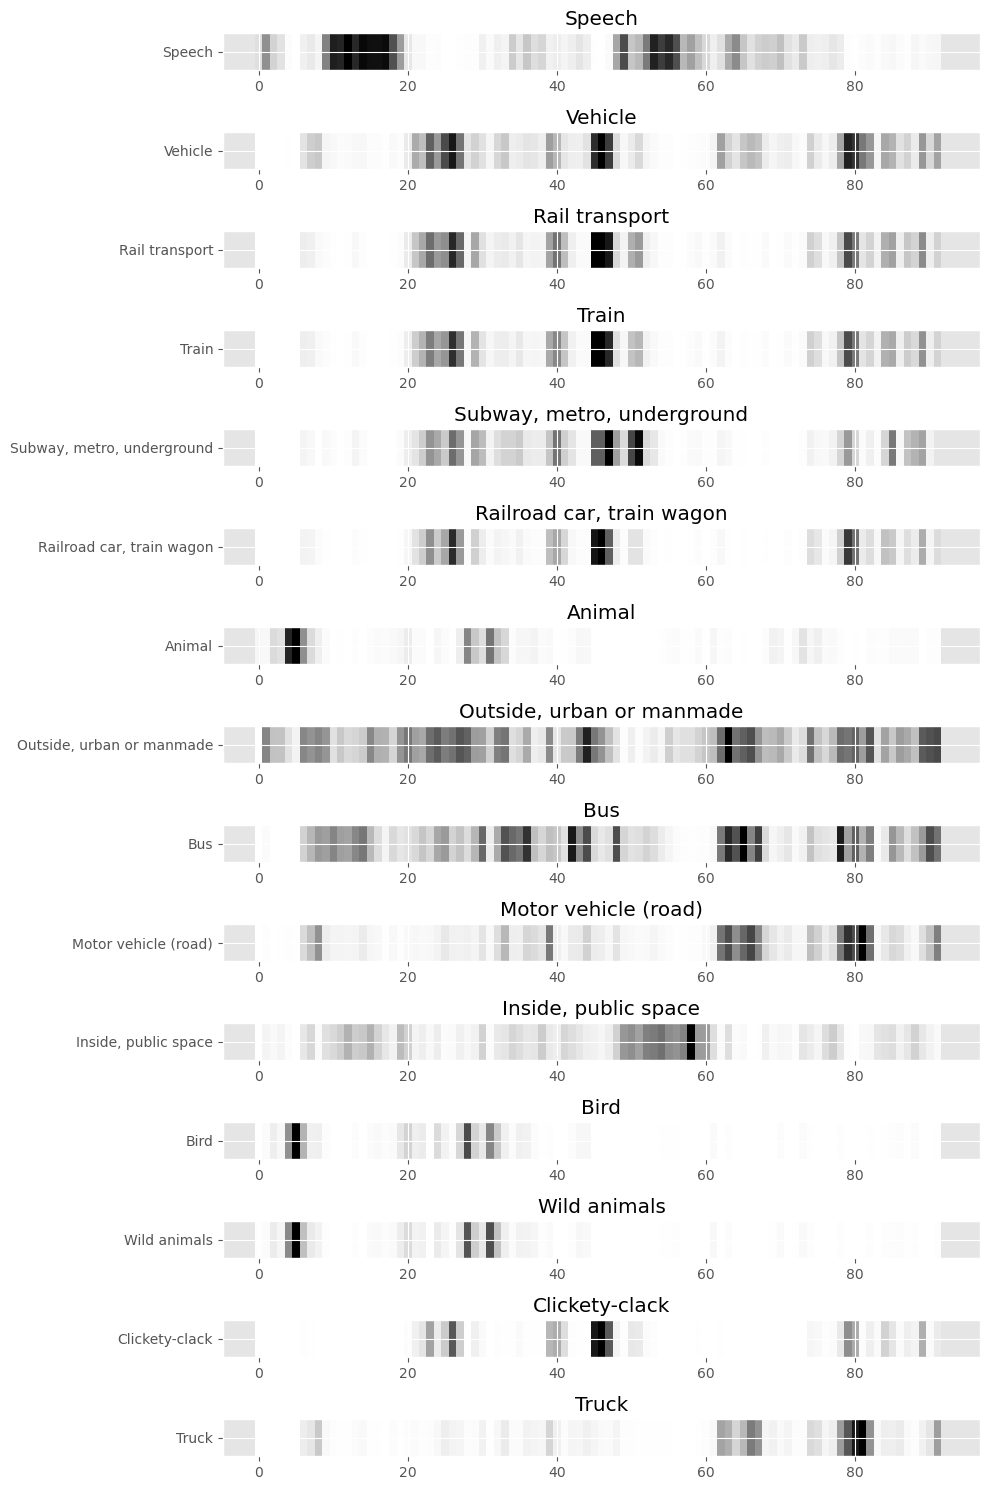

In [23]:
# Define the number of rows and columns for the subplots
num_rows = 15
num_cols = 1

# Define the top class names and their corresponding indices
top_N = 15
top_class_indices = np.argsort(mean_scores)[::-1][:top_N]
top_class_names = [class_names[top_class_indices[x]] for x in range(top_N)]

# Set the vertical spacing between subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))  # Update figsize as needed
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing as needed

# Loop over the y-axis labels and create subplots for each subset of classes
for i, y_label in enumerate(top_class_names):
    # Check if the current subplot exceeds the number of rows and columns
    if i >= (num_rows * num_cols):
        break

    # Create a new subplot
    ax = axes[i]

    # Filter the scores and class names for the current y-axis label
    filtered_indices = [x for x in range(top_N) if top_class_names[x] == y_label]
    filtered_scores = scores[:, top_class_indices[filtered_indices]]
    filtered_class_names = [class_names[top_class_indices[x]] for x in filtered_indices]

    # Plot the filtered scores
    ax.imshow(filtered_scores.T, aspect='auto', interpolation='nearest', cmap='gray_r')
    patch_padding = (params.patch_window_seconds / 2) / params.patch_hop_seconds
    ax.set_xlim([-patch_padding, scores.shape[0] + patch_padding])
    ax.set_title(y_label)  # Set the title as the current y-axis label

    # Label the y-axis with the filtered class names
    yticks = range(0, len(filtered_class_names), 1)
    ax.set_yticks(yticks)
    ax.set_yticklabels(filtered_class_names)

# Adjust the layout and display the subplots
plt.tight_layout()
plt.show()


In [24]:
# Assuming `scores` contains the raw data of the gray values in the table
# and `top_class_indices` contains the indices of the top N classes.

# Extract the gray values for the top N classes
gray_values = scores[:, top_class_indices].T

# Print the raw data of the gray values as lists
for i in range(top_N):
    class_name = top_class_names[i]
    gray_values_for_class = gray_values[i, :]
    print("Class: ", class_name)
    print("Gray Values: ", gray_values_for_class.tolist())
    print("-----")


Class:  Speech
Gray Values:  [0.11437787115573883, 0.38439029455184937, 0.15040923655033112, 0.10174943506717682, 0.012826919555664062, 0.003408040152862668, 0.05525693669915199, 0.07969039678573608, 0.0427960529923439, 0.43331897258758545, 0.7740235924720764, 0.7561482191085815, 0.8801266551017761, 0.7400209307670593, 0.8476401567459106, 0.8255534172058105, 0.818600594997406, 0.8397116661071777, 0.6022650003433228, 0.34370940923690796, 0.08602330833673477, 0.027730528265237808, 0.02629704587161541, 0.009887224063277245, 0.01289383415132761, 0.0019381524762138724, 0.0025671622715890408, 0.005857325624674559, 0.011279556900262833, 0.010225088335573673, 0.05507710203528404, 0.022232649847865105, 0.05860576033592224, 0.041153743863105774, 0.17742282152175903, 0.08965367823839188, 0.19744990766048431, 0.11537116020917892, 0.14445392787456512, 0.05057908222079277, 0.06701873987913132, 0.04146408289670944, 0.06274442374706268, 0.0974602922797203, 0.06117529794573784, 0.005797288380563259, 0.

Combined2 Gray Values for Music and Speech Classes:  [0.11594238132238388, 0.3915926218032837, 0.17946207523345947, 0.11579568684101105, 0.20035278797149658, 0.435150682926178, 0.1846507489681244, 0.10584469884634018, 0.0714426040649414, 0.4386752247810364, 0.7747208476066589, 0.7569605708122253, 0.8806381821632385, 0.7452989816665649, 0.8491743803024292, 0.8340145349502563, 0.8301460146903992, 0.8449164032936096, 0.612399160861969, 0.3856951594352722, 0.16029906272888184, 0.056268900632858276, 0.06105627864599228, 0.012285354547202587, 0.07373790442943573, 0.025469280779361725, 0.009900880977511406, 0.07399658113718033, 0.31513744592666626, 0.08416632562875748, 0.09452623128890991, 0.22724978625774384, 0.1494787335395813, 0.06788448989391327, 0.18561811745166779, 0.1157396137714386, 0.21956488490104675, 0.12330926209688187, 0.1472208946943283, 0.054550476372241974, 0.06711207330226898, 0.042803164571523666, 0.06836268305778503, 0.11239665001630783, 0.07547735422849655, 0.0063067735172

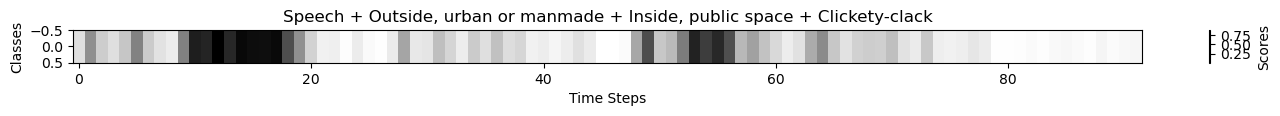

In [45]:
# Assuming `scores` contains the raw data of the gray values in the table
# and `top_class_indices` contains the indices of the top N classes.

# Extract the gray values for the top N classes
gray_values = scores[:, top_class_indices].T

# Find the indices of specific classes
speech_index = top_class_names.index("Speech")
outside_index = top_class_names.index("Outside, urban or manmade")
inside_index = top_class_names.index("Inside, public space")
clickety_index = top_class_names.index("Clickety-clack")
#_index = top_class_names.index("Inside, public space")
#_index = top_class_names.index("Inside, public space")
#_index = top_class_names.index("Inside, public space")


# Extract the gray values of specific classes
speech_gray_values = gray_values[speech_index, :]
outside_gray_values = gray_values[outside_index, :]
inside_gray_values = gray_values[inside_index, :]
clickety_gray_values = gray_values[clickety_index, :]





# Add the gray values of specific classes
combined2_gray_values = speech_gray_values + outside_gray_values + inside_gray_values + clickety_gray_values

# Convert the combined gray values to a list
combined2_gray_values_list = combined_gray_values.tolist()

# Print the combined gray values list
print("Combined2 Gray Values for Music and Speech Classes: ", combined2_gray_values_list)
# Generate grayscale data (example)
scores = np.array(combined2_gray_values_list)

# Create the figure and subplot
plt.figure(figsize=(100, 5))

# Create a 10x5 grid of subplots
for i in range(1, 2):  # 10x5 = 50 subplots
    plt.subplot(10, 5, i)
    
    # Plot the grayscale image
    plt.imshow(scores[np.newaxis, :], aspect='auto', interpolation='nearest', cmap='gray_r')

    # Set x-axis limit
    plt.xlim([-0.5, scores.shape[0] - 0.5])

    # Set y-axis limit for the specific subplot
    if i == 5:  # Set y-axis limit for the 5th subplot
        plt.ylim([-0.5, 9.5])  # Example limit for y-axis
    
    # Set colorbar
    cbar = plt.colorbar()
    cbar.set_label('Scores')

    # Set xlabel, ylabel, and title
    plt.xlabel('Time Steps')
    plt.ylabel('Classes')
    plt.title('Speech + Outside, urban or manmade + Inside, public space + Clickety-clack')

# Show the plot
plt.show()


Combined2 Gray Values for Music and Speech Classes:  [0.00011206749331904575, 0.006767782382667065, 0.0015862468862906098, 0.0027893257793039083, 0.006749380379915237, 0.0038997705560177565, 0.17619580030441284, 0.27609938383102417, 0.35754382610321045, 0.09974698722362518, 0.09221819788217545, 0.06863204389810562, 0.07146754115819931, 0.09911653399467468, 0.11203491687774658, 0.05212219059467316, 0.035869356244802475, 0.013025970198214054, 0.04683119058609009, 0.029597071930766106, 0.1039864718914032, 0.34243762493133545, 0.3327399790287018, 0.7296743392944336, 0.467480331659317, 0.7983631491661072, 1.1617482900619507, 0.6686533093452454, 0.12316901981830597, 0.2778838574886322, 0.23178774118423462, 0.0569782480597496, 0.2181897759437561, 0.3396151661872864, 0.15224795043468475, 0.16982530057430267, 0.23235902190208435, 0.15183722972869873, 0.10921724885702133, 0.5929136276245117, 0.4447905421257019, 0.17876262962818146, 0.20267359912395477, 0.13516834378242493, 0.2289365977048874, 1.

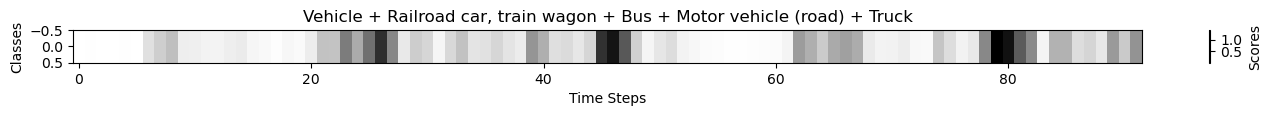

In [58]:
# Assuming `scores` contains the raw data of the gray values in the table
# and `top_class_indices` contains the indices of the top N classes.

# Extract the gray values for the top N classes
gray_values = scores[:, top_class_indices].T

# Find the indices of the "Music" and "Speech" classes
vehicle_index = top_class_names.index("Vehicle")
car_index = top_class_names.index("Railroad car, train wagon")
bus_index = top_class_names.index("Bus")
motor_index = top_class_names.index("Motor vehicle (road)")
truck_index = top_class_names.index("Truck")
#_index = top_class_names.index("Inside, public space")
#_index = top_class_names.index("Inside, public space")


# Extract the gray values for "Music" and "Speech" classes
vehicle_gray_values = gray_values[vehicle_index, :]
car_gray_values = gray_values[car_index, :]
bus_gray_values = gray_values[bus_index, :]
motor_gray_values = gray_values[motor_index, :]
truck_gray_values = gray_values[truck_index, :]



# Add the gray values for "Music" and "Speech" classes
combined1_gray_values = vehicle_gray_values + car_gray_values + bus_gray_values + motor_gray_values + truck_gray_values

# Convert the combined gray values to a list
combined1_gray_values_list = combined1_gray_values.tolist()

# Print the combined gray values list
print("Combined2 Gray Values for Music and Speech Classes: ", combined1_gray_values_list)
# Generate grayscale data (example)
scores = np.array(combined1_gray_values_list)

# Create the figure and subplot
plt.figure(figsize=(100, 5))

# Create a 10x5 grid of subplots
for i in range(1, 2):  # 10x5 = 50 subplots
    plt.subplot(10, 5, i)
    
    # Plot the grayscale image
    plt.imshow(scores[np.newaxis, :], aspect='auto', interpolation='nearest', cmap='gray_r')

    # Set x-axis limit
    plt.xlim([-0.5, scores.shape[0] - 0.5])

    # Set y-axis limit for the specific subplot
    if i == 5:  # Set y-axis limit for the 5th subplot
        plt.ylim([-0.5, 9.5])  # Example limit for y-axis
    
    # Set colorbar
    cbar = plt.colorbar()
    cbar.set_label('Scores')

    # Set xlabel, ylabel, and title
    plt.xlabel('Time Steps')
    plt.ylabel('Classes')
    plt.title('Vehicle + Railroad car, train wagon + Bus + Motor vehicle (road) + Truck')

# Show the plot
plt.show()



Combined3 Gray Values:  [1.5501614143431652e-06, 6.673362076980993e-05, 1.5415005691465922e-05, 3.342152194818482e-05, 2.7668498660204932e-05, 3.1785348255652934e-05, 0.06408393383026123, 0.05421933904290199, 0.01794147863984108, 0.018851306289434433, 0.008772827684879303, 0.002297015395015478, 0.00679299421608448, 0.03622445464134216, 0.014043746516108513, 0.0017048646695911884, 0.0025440515018999577, 0.00208007893525064, 0.004973309580236673, 0.016373345628380775, 0.075538769364357, 0.1786305010318756, 0.2868265211582184, 0.5280884504318237, 0.37787866592407227, 0.3707086443901062, 0.8006958961486816, 0.5412301421165466, 0.036036401987075806, 0.3513733744621277, 0.18526527285575867, 0.04817896708846092, 0.10115128755569458, 0.12233191728591919, 0.10373522341251373, 0.15121525526046753, 0.06129211187362671, 0.058882951736450195, 0.056932806968688965, 0.3277793228626251, 0.549782395362854, 0.23494546115398407, 0.08460183441638947, 0.024286866188049316, 0.025239866226911545, 0.942409038

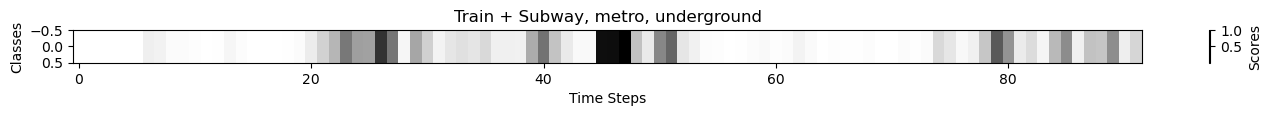

In [71]:
# Assuming `scores` contains the raw data of the gray values in the table
# and `top_class_indices` contains the indices of the top N classes.

# Extract the gray values for the top N classes
gray_values = scores[:, top_class_indices].T

# Find the indices of the "Music" and "Speech" classes
train_index = top_class_names.index("Train")
subway_index = top_class_names.index("Subway, metro, underground")

#_index = top_class_names.index("Inside, public space")
#_index = top_class_names.index("Inside, public space")


# Extract the gray values for "Music" and "Speech" classes
train_gray_values = gray_values[train_index, :]
subway_gray_values = gray_values[subway_index, :]



# Add the gray values for "Music" and "Speech" classes
combined3_gray_values = train_gray_values + subway_gray_values

# Convert the combined gray values to a list
combined3_gray_values_list = combined3_gray_values.tolist()

# Print the combined gray values list
print("Combined3 Gray Values: ", combined3_gray_values_list)
# Generate grayscale data (example)
scores = np.array(combined3_gray_values_list)

# Create the figure and subplot
plt.figure(figsize=(100, 5))

# Create a 10x5 grid of subplots
for i in range(1, 2):  # 10x5 = 50 subplots
    plt.subplot(10, 5, i)
    
    # Plot the grayscale image
    plt.imshow(scores[np.newaxis, :], aspect='auto', interpolation='nearest', cmap='gray_r')

    # Set x-axis limit
    plt.xlim([-0.5, scores.shape[0] - 0.5])

    # Set y-axis limit for the specific subplot
    if i == 5:  # Set y-axis limit for the 5th subplot
        plt.ylim([-0.5, 9.5])  # Example limit for y-axis
    
    # Set colorbar
    cbar = plt.colorbar()
    cbar.set_label('Scores')

    # Set xlabel, ylabel, and title
    plt.xlabel('Time Steps')
    plt.ylabel('Classes')
    plt.title('Train + Subway, metro, underground')

# Show the plot
plt.show()



Combined0 Gray Values:  [0.02475626952946186, 0.032324813306331635, 0.14429812133312225, 0.09987027943134308, 0.8755017518997192, 1.4218437671661377, 0.48692646622657776, 0.143710196018219, 0.0877654105424881, 0.01978186145424843, 0.0023051013704389334, 0.004910824820399284, 0.0021645224187523127, 0.014901692047715187, 0.004813929088413715, 0.025603700429201126, 0.03453854098916054, 0.019870201125741005, 0.03495800122618675, 0.09257209300994873, 0.1747743934392929, 0.05907827988266945, 0.06861589103937149, 0.004328172653913498, 0.11537261307239532, 0.049622803926467896, 0.015119845978915691, 0.15263494849205017, 0.8521934747695923, 0.27959293127059937, 0.15379276871681213, 0.8018077611923218, 0.32343316078186035, 0.14493043720722198, 0.02382013201713562, 0.07030130922794342, 0.06490714848041534, 0.05043654143810272, 0.017792660742998123, 0.028386661782860756, 0.0004264964663889259, 0.00546575291082263, 0.01782400719821453, 0.047192513942718506, 0.04374363273382187, 0.001913996296934783

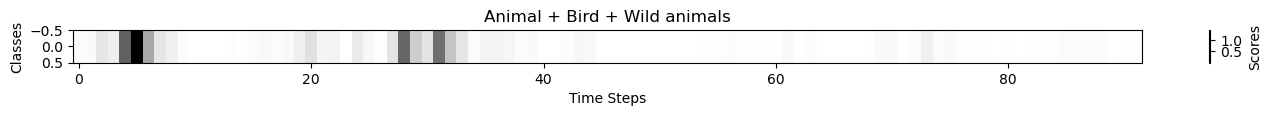

In [84]:
# Assuming `scores` contains the raw data of the gray values in the table
# and `top_class_indices` contains the indices of the top N classes.

# Extract the gray values for the top N classes
gray_values = scores[:, top_class_indices].T

# Find the indices of the "Music" and "Speech" classes
animal_index = top_class_names.index("Animal")
bird_index = top_class_names.index("Bird")
animals_index = top_class_names.index("Wild animals")

#_index = top_class_names.index("Inside, public space")
#_index = top_class_names.index("Inside, public space")


# Extract the gray values for "Music" and "Speech" classes
animal_gray_values = gray_values[animal_index, :]
bird_gray_values = gray_values[bird_index, :]
animals_gray_values = gray_values[animals_index, :]


# Add the gray values for "Music" and "Speech" classes
combined0_gray_values = animal_gray_values + bird_gray_values + animals_gray_values


# Convert the combined gray values to a list
combined0_gray_values_list = combined0_gray_values.tolist()

# Print the combined gray values list
print("Combined0 Gray Values: ", combined0_gray_values_list)
# Generate grayscale data (example)
scores = np.array(combined0_gray_values_list)

# Create the figure and subplot
plt.figure(figsize=(100, 5))

# Create a 10x5 grid of subplots
for i in range(1, 2):  # 10x5 = 50 subplots
    plt.subplot(10, 5, i)
    
    # Plot the grayscale image
    plt.imshow(scores[np.newaxis, :], aspect='auto', interpolation='nearest', cmap='gray_r')

    # Set x-axis limit
    plt.xlim([-0.5, scores.shape[0] - 0.5])

    # Set y-axis limit for the specific subplot
    if i == 5:  # Set y-axis limit for the 5th subplot
        plt.ylim([-0.5, 9.5])  # Example limit for y-axis
    
    # Set colorbar
    cbar = plt.colorbar()
    cbar.set_label('Scores')

    # Set xlabel, ylabel, and title
    plt.xlabel('Time Steps')
    plt.ylabel('Classes')
    plt.title('Animal + Bird + Wild animals')

# Show the plot
plt.show()

